In [92]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [93]:
#load dataset
df=pd.read_csv('airline_passenger_satisfaction.csv')

In [94]:
#visualizing dataset
df.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [95]:
# getting a list with the categories names
x = list(df.columns.values)
print(x)

['Unnamed: 0', 'Gender', 'customer_type', 'age', 'type_of_travel', 'customer_class', 'flight_distance', 'inflight_wifi_service', 'departure_arrival_time_convenient', 'ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'onboard_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes', 'satisfaction']


In [96]:
#dataset categories
cat_names = ['id',
 'gender',
 'customer_type',
 'age',
 'type_of_travel',
 'customer_class',
 'flight_distance',
 'inflight_wifi_service',
 'departure_arrival_time_convenient',
 'ease_of_online_booking',
 'gate_location',
 'food_and_drink',
 'online_boarding',
 'seat_comfort',
 'inflight_entertainment',
 'onboard_service',
 'leg_room_service',
 'baggage_handling',
 'checkin_service',
 'inflight_service',
 'cleanliness',
 'departure_delay_in_minutes',
 'arrival_delay_in_minutes',
 'satisfaction']
#load dataset without heade
df=pd.read_csv('airline_passenger_satisfaction.csv', skiprows=1, header=None, names=cat_names)

In [97]:
# info() to get more information about dataset and possibles null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

In [98]:
# we can see we have almost 400 null values only in a specific category (around 0.3% of total data)
# even its not a relevant number so we could just dropped the incomplete rows, let's try to keep this data
# replacing the null values but in a way to keep the data pattern intact at most
df.isnull().sum()

id                                     0
gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

In [99]:
# Let´s see what values we have in the collumn, and if we have some non-standards values
unique = df['arrival_delay_in_minutes'].unique()
unique.sort()
for i in unique:
    print('{:f}'.format(i))
    i ='{:f}'.format(i)

0.000000
1.000000
2.000000
3.000000
4.000000
5.000000
6.000000
7.000000
8.000000
9.000000
10.000000
11.000000
12.000000
13.000000
14.000000
15.000000
16.000000
17.000000
18.000000
19.000000
20.000000
21.000000
22.000000
23.000000
24.000000
25.000000
26.000000
27.000000
28.000000
29.000000
30.000000
31.000000
32.000000
33.000000
34.000000
35.000000
36.000000
37.000000
38.000000
39.000000
40.000000
41.000000
42.000000
43.000000
44.000000
45.000000
46.000000
47.000000
48.000000
49.000000
50.000000
51.000000
52.000000
53.000000
54.000000
55.000000
56.000000
57.000000
58.000000
59.000000
60.000000
61.000000
62.000000
63.000000
64.000000
65.000000
66.000000
67.000000
68.000000
69.000000
70.000000
71.000000
72.000000
73.000000
74.000000
75.000000
76.000000
77.000000
78.000000
79.000000
80.000000
81.000000
82.000000
83.000000
84.000000
85.000000
86.000000
87.000000
88.000000
89.000000
90.000000
91.000000
92.000000
93.000000
94.000000
95.000000
96.000000
97.000000
98.000000
99.000000
100.000000

In [100]:
# even if we have some outliers, it's not too significant 
# to make the mean value replace a bad idea in this case
m = round(df['arrival_delay_in_minutes'].mean(),2)
m

15.09

In [101]:
# then we replace the nan values with the mean we got
df['arrival_delay_in_minutes'].fillna(m,inplace=True)

In [102]:
# dataset is now complete
df.isnull().sum()

id                                   0
gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

In [103]:
# transform every category with string values to binary value 
# for fit properly in our logistic regression
# male = 0 / female = 1
df_gender = pd.get_dummies(df["gender"])
df = pd.concat((df_gender, df), axis=1)
df = df.drop(["gender"], axis=1)
df = df.drop(["Male"], axis=1)
df = df.rename(columns={"Female": "gender"})

In [104]:
df_customer_type = pd.get_dummies(df["customer_type"])
df = pd.concat((df_customer_type, df), axis=1)
df = df.drop(["customer_type"], axis=1)
df = df.drop(["disloyal Customer"], axis=1)

In [105]:
#Business travel: 1 (yes) or 0 (no, personal travel)
df_type_of_travel = pd.get_dummies(df["type_of_travel"])
df = pd.concat((df_type_of_travel, df), axis=1)
df = df.drop(["type_of_travel"], axis=1)
df = df.drop(["Personal Travel"], axis=1)

In [106]:
#customer class split in 2 categories (business class and eco class), if both 0 = Eco class
df_customer_class = pd.get_dummies(df["customer_class"])
df = pd.concat((df_customer_class, df), axis=1)
df = df.drop(["customer_class"], axis=1)
df = df.drop(["Eco"], axis=1)
df = df.rename(columns={"Eco Plus": "Eco Plus class"})
df = df.rename(columns={"Business": "Business class"})

In [107]:
#Satisfaction = 1 (satisfied) / 0 (neutral or dissatisfied)
df_satisfaction = pd.get_dummies(df["satisfaction"])
df = pd.concat((df_satisfaction, df), axis=1)
df = df.drop(["satisfaction"], axis=1)
df = df.drop(["neutral or dissatisfied"], axis=1)
df = df.rename(columns={"satisfied": "satisfaction"})

In [108]:
df.head()

,satisfaction,Business class,Eco Plus class,Business travel,Loyal Customer,gender,id,age,flight_distance,inflight_wifi_service,...,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,0,0,1,0,1,0,0,13,460,3,...,5,5,4,3,4,4,5,5,25,18.0
1,0,1,0,1,0,0,1,25,235,3,...,1,1,1,5,3,1,4,1,1,6.0
2,1,1,0,1,1,1,2,26,1142,2,...,5,5,4,3,4,4,4,5,0,0.0
3,0,1,0,1,1,1,3,25,562,2,...,2,2,2,5,3,1,4,2,11,9.0
4,1,1,0,1,1,0,4,61,214,3,...,5,3,3,4,4,3,3,3,0,0.0


In [109]:
#Split X e y
X = df.drop("satisfaction", axis=1)
y = df["satisfaction"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [110]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# saving predicts values in a variable
y_pred=logreg.predict(X_test)

In [111]:
# Accuracy from the logistic regression with default parameters
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6682707114259316
Precision: 0.6080454254638515
Recall: 0.6717024472126513


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# learning rate dict used to find the greatest one 
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
param_grid = dict(learning_rate=learning_rate)
# kfold method in cross validation to avoid overfit 
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
# Using gridsearchCV to loop through learning rate dict
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1)#, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Text(0, 0.5, 'Log Loss')

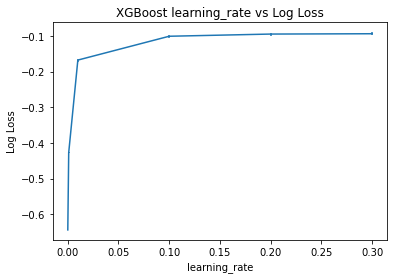

In [121]:
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
# plot the loss function within each choosen learning rate
pyplot.errorbar(learning_rate, means, yerr=stds)
pyplot.title("XGBoost learning_rate vs Log Loss")
pyplot.xlabel('learning_rate')
pyplot.ylabel('Log Loss')

In [122]:
# Using gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

# Greatest learning rate 0.3
params = {'n_estimators': 1000,'learning_rate': 0.3, 'max_features' : 'sqrt'}


model = GradientBoostingClassifier(**params)
model.fit(X_train, y_train)
y_pred_boost=model.predict(X_test)

In [123]:
# Found a superior accuracy, almost 30% more than the initial one
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_boost))
print("Precision:",metrics.precision_score(y_test, y_pred_boost))
print("Recall:",metrics.recall_score(y_test, y_pred_boost))


Accuracy: 0.9590006159531875
Precision: 0.9646547036432844
Recall: 0.9403657566922873


/var/folders/88/knx7zw015qbbjy6wrxv2zrsc0000gn/T/ipykernel_2416/643622713.py:21: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


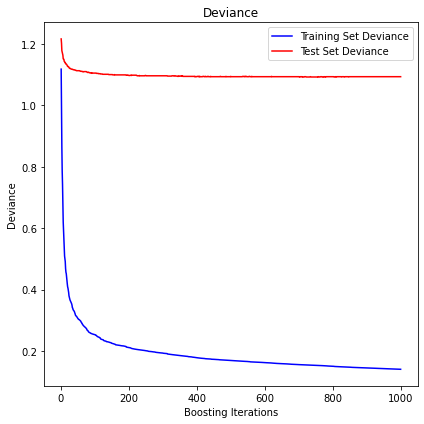

In [124]:
# Plot the gotten deviance through each estimator
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred_boost in enumerate(model.staged_predict(X_test)):
    test_score[i] = model.loss_(y_test, y_pred_boost)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()